# 2. Create the Skybox

Project the Stars: Convert the celestial coordinates (right ascension and declination) from the star catalog into 3D coordinates on the cube. 

Convert the celestial coordinates of the stars into 3D coordinates on the cube.

http://faraday.uwyo.edu/~admyers/ASTR5160/handouts/51605.pdf slide 2

https://www.diva-portal.org/smash/get/diva2:1044866/FULLTEXT01.pdf pg 40

The celestial sphere is projected onto the faces of the cube: need to convert the right ascension and declination of each star into Cartesian coordinates.

x = cos(declination) * cos(right ascension)

y = cos(declination) * sin(right ascension)

z = sin(declination)

where x, y, and z are the 3D coordinates of the star.
Note: The origin is at the center of the Earth.

In [1]:
import csv

# Define the path to the CSV file
csv_file = '/Users/carloschavez/Documents/Academic & Professional Development/Academia /MS Aerospace CU Boulder/ASEN 6044 Advance State Estimation/skybox/bright_stars.csv'

# Create empty lists to store the right ascension and declination data
right_ascension = []
declination = []
magnitudes = []


# Read the CSV file and extract the data
with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row if it exists
    for row in reader: # Each row contains this: star_id, ra, dec, mag, color, etc
        # star_id = row[0]
        ra = float(row[0]) # start at 0 because the first element in the row is the right ascension and star_id is not read
        dec = float(row[1])
        mag = float(row[2])
        right_ascension.append(ra)
        declination.append(dec)
        magnitudes.append(mag)


# Display the first few entries in the lists
print(right_ascension[:5])
print(declination[:5])

# Now, convert the celestial coordinates to 3D coordinates using the formulas mentioned earlier.
import math
xyz_coordinates = []
xyz_mag_coordinates = []
for ra, dec, mag in zip(right_ascension, declination, magnitudes):
    x = math.cos(math.radians(dec)) * math.cos(math.radians(ra))
    y = math.cos(math.radians(dec)) * math.sin(math.radians(ra))
    z = math.sin(math.radians(dec))
    xyz_coordinates.append((x, y, z))  # Store 3D coordinates
    xyz_mag_coordinates.append((x, y, z, mag))  # Store 3D coordinates with magnitude
    print(f'RA: {ra}, Dec: {dec} -> x: {x:.3f}, y: {y:.3f}, z: {z:.3f}') # Display the 3D coordinates
    print(f'RA: {ra}, Dec: {dec}, Mag: {mag} -> x: {x:.3f}, y: {y:.3f}, z: {z:.3f}') # Display the 3D coordinates with magnitude 
# Display the first few entries in the list of 3D coordinates
print("\n")
print(xyz_coordinates[:])


[1.2875, 1.2625, 1.3333333333333333, 1.425, 1.5666666666666669]
[45.22916666666667, -0.5030555555555556, -5.7075000000000005, 13.39611111111111, 58.43666666666666]
RA: 1.2875, Dec: 45.22916666666667 -> x: 0.704, y: 0.016, z: 0.710
RA: 1.2875, Dec: 45.22916666666667, Mag: 6.7 -> x: 0.704, y: 0.016, z: 0.710
RA: 1.2625, Dec: -0.5030555555555556 -> x: 1.000, y: 0.022, z: -0.009
RA: 1.2625, Dec: -0.5030555555555556, Mag: 6.29 -> x: 1.000, y: 0.022, z: -0.009
RA: 1.3333333333333333, Dec: -5.7075000000000005 -> x: 0.995, y: 0.023, z: -0.099
RA: 1.3333333333333333, Dec: -5.7075000000000005, Mag: 4.61 -> x: 0.995, y: 0.023, z: -0.099
RA: 1.425, Dec: 13.39611111111111 -> x: 0.972, y: 0.024, z: 0.232
RA: 1.425, Dec: 13.39611111111111, Mag: 5.51 -> x: 0.972, y: 0.024, z: 0.232
RA: 1.5666666666666669, Dec: 58.43666666666666 -> x: 0.523, y: 0.014, z: 0.852
RA: 1.5666666666666669, Dec: 58.43666666666666, Mag: 5.96 -> x: 0.523, y: 0.014, z: 0.852
RA: 1.579166666666667, Dec: -49.075 -> x: 0.655, y: 0.

**Using the Astrop library** (for the same calculation as last)

In [32]:
from astropy.coordinates import SkyCoord
from astropy import units as u

right_ascension = []
declination = []
magnitudes = []
coordinates = []
coord_mag = []

with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row if it exists
    for row in reader:
        ra = float(row[0]) * u.degree  # assuming RA is in degrees
        dec = float(row[1]) * u.degree  # assuming Dec is in degrees
        mag = float(row[2])
        
        # Create a SkyCoord object for each star
        coord = SkyCoord(ra=ra, dec=dec, frame='icrs')
        
        # Convert to 3D Cartesian coordinates
        x, y, z = coord.cartesian.x.value, coord.cartesian.y.value, coord.cartesian.z.value
        
        # Append to lists
        right_ascension.append(ra)
        declination.append(dec)
        magnitudes.append(mag)
        coordinates.append((x, y, z))  # Store 3D coordinates
        coord_mag.append((x, y, z, mag))  # Store 3D coordinates with magnitude

print("\n")
print(coord_mag[:])
# sort entire coord_mag by magnitude 
coord_mag.sort(key=lambda x: x[3])
# Truncate to top 500 brightest stars
coord_mag = coord_mag[:500]
print("\n")
display(coord_mag[:10])




[(0.7040951044381669, 0.015824465058753404, 0.7099293417036734, 6.7), (0.9997187096348651, 0.022032149518370313, -0.00877986296023728, 6.29), (0.9947731439613501, 0.02315360193086952, -0.0994500013618795, 4.61), (0.9724907543038803, 0.02419174924319183, 0.23168187685277467, 5.51), (0.5232450652342131, 0.014310913828500582, 0.852062086618949, 5.96), (0.6548217598939972, 0.018052544653736215, -0.7555677126511251, 5.7), (0.4351207203051021, 0.012217357602352489, 0.9002892284895923, 5.59), (0.8740760935193173, 0.025178545228720216, 0.48513608770959826, 6.13), (0.9193613267864421, 0.027419841231165136, -0.3924575175943641, 6.18), (0.9538272761530918, 0.030391832169614438, -0.29881409572466194, 6.19), (0.9984419597801256, 0.033703251595005417, -0.04447183133564382, 6.43), (0.9232897316599482, 0.031300865387737214, -0.3828267587790585, 5.94), (0.8330878955313283, 0.0292740449784877, -0.5523654484214053, 5.68), (0.9984481383744284, 0.035738976996229466, -0.04270878715090291, 6.07), (0.873267

[(-0.18739258117140928, 0.939230054569575, -0.2876298404462758, -1.46),
 (-0.06321758690270313, 0.6027400686558182, -0.7954294100314487, -0.72),
 (-0.7838123807664005, -0.5269483144405749, 0.32857818805505706, -0.04),
 (-0.37387926183641473, -0.3125653910712652, -0.873222293504423, -0.01),
 (0.12507778028512792, -0.7694170275517036, 0.626380863845988, 0.03),
 (0.13051792359972206, 0.6823116880080063, 0.719316225332699, 0.08),
 (0.19507121846705786, 0.9703586930635583, -0.14265772506864302, 0.12),
 (-0.4181035645017774, 0.9038230972780544, 0.09106710809953723, 0.38),
 (0.49273724316306367, 0.2237748152159118, -0.8409130997166998, 0.46),
 (0.020911865395555836, 0.9914350271630301, 0.1289157895679188, 0.5)]

In [3]:
from scipy.io import savemat

# Convert DataFrame to a dictionary where the column names are keys
mat_data = {'x': [x for x, y, z, mag in coord_mag],
            'y': [y for x, y, z, mag in coord_mag],
            'z': [z for x, y, z, mag in coord_mag],
            'mag': [mag for x, y, z, mag in coord_mag]}
savemat('3Dcoordinates_stars_sorted.mat', mat_data)

# Visualizing the 3D Star Map

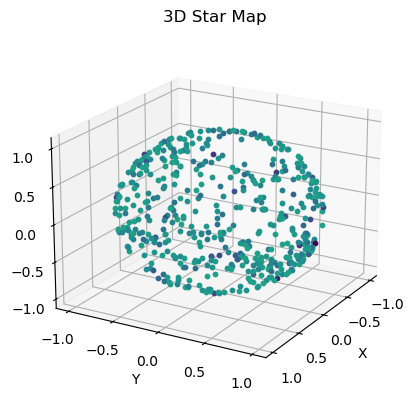

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each star individually
max_mag = max(magnitudes)  # Find the maximum magnitude for scaling
min_mag = min(magnitudes)  # Find the minimum magnitude for scaling

for coord in coord_mag:
    x, y, z, mag = coord
    # Adjust these values as needed for better visualization
    # size = ((max_mag - mag) / (max_mag - min_mag)) * 100  
    # ax.scatter(x, y, z, color=plt.cm.viridis((mag - min_mag) / (max_mag - min_mag)), s=size)
    ax.scatter(x, y, z, color=plt.cm.viridis((mag - min_mag) / (max_mag - min_mag)), s=10)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Star Map')

# Adjust the view angle
ax.view_init(elev=20, azim=30)  # Adjust these angles to change the perspective

plt.show()


# Check Field of View in terms of View Angle (Method 1) - probably more applicable to 2D spaces (robots on roads)

In [30]:
import numpy as np

# def project_to_face(x, y, z):
#     # Determine which face of the cube the point projects onto
#     # Assumes cube is at origin
#     max_dim = max(abs(x), abs(y), abs(z))
#     display(max_dim)
#     if max_dim == abs(x):
#         face = 'left' if x < 0 else 'right'
#     elif max_dim == abs(y):
#         face = 'bottom' if y < 0 else 'top'
#     else:
#         face = 'front' if z < 0 else 'back'
#     return face, (x, y, z)

# def check_visibility(camera_ray, star_position, camera_position, fov_threshold):
#     # Calculate if the star's projection is within the camera's fov_threshold
#     vector_to_star = np.array(star_position) - np.array(camera_position)
#     # https://freakoutstudios.com/dot-product-fov_threshold.html
#     # Detection/fov_threshold determination
#     # Calculate the normalized dot product between the camera's position to the position of the star
#     # Compare the dot product value to a threshold based on the field of view angle.
#     star_angle = np.arccos(np.dot(camera_ray, vector_to_star) / (np.linalg.norm(camera_ray) * np.linalg.norm(vector_to_star)))
#     return star_angle < fov_threshold

# stars = coordinates  # Use the 3D coordinates from the earlier
# camera_position = (0, 0, 0) # Camera at origin of the coordinate system of the Earth
# camera_ray = (0, 0, 1)  # Direction vector of the spacecraft or camera
# fov_threshold = np.radians(45)  # SPEC: 45 degree field of view for the camera 

# for star in stars:
#     face, projected = project_to_face(*star)
#     visible = check_visibility(camera_ray, projected, camera_position, fov_threshold)
#     print(f"Star at {star} projects to {face} face and is {'visible' if visible else 'not visible'}")


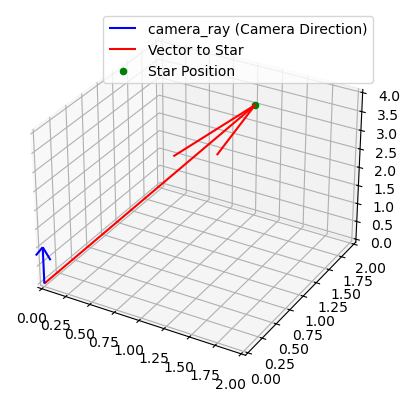

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define vectors
camera_position = np.array([0, 0, 0])
star_position = np.array([1, 2, 3])
camera_ray = np.array([0, 0, 1])  # Assuming the camera points along the z-axis

# Calculate vector to star
vector_to_star = star_position - camera_position

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(*camera_position, *camera_ray, color='blue', label='camera_ray (Camera Direction)')
ax.quiver(*camera_position, *vector_to_star, color='red', label='Vector to Star')
ax.scatter(*star_position, color='green', label='Star Position')
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
ax.set_zlim([0, 4])
ax.legend()
plt.show()


# Implement the Pinhole Camera Model


Below are specs for the 5044 (Fall '23) project. Recycle?

| Parameter | Value | Units | Description |
|-----------|-------|-------|-------------|
| μA        | 4.892 · 10−9 | km3/s2 | Asteroid gravitational parameter (GM) |
| ωA        | 4.296057 | hours | Asteroid Rotation Period |
| rS        | [1.5 · 108, 0, 0]T | km | Inertial Sun position w.r.t. the asteroid center (1 AU) |
| Φ0        | 1 · 1014 | kg km/s2 | Solar pressure constant |
| ρ         | 0.4 | - | Coefficient of reflectivity |
| A/m       | (1/62) · 10−6 | km2/kg | Area-to-mass ratio |
| σw        | 1 · 10−9 | km/s2 | Process noise standard deviation |
| f         | 2089.7959 | pixels | Camera focal length |
| (u0, v0)  | (512, 512) | pixels | Camera principal point coordinates |
| (umin, vmin) | (0, 0) | pixels | Min. pixel coordinates |
| (umax, vmax) | (1024, 1024) | pixels | Max. pixel coordinates |
| (σu, σv)  | (0.25, 0.25) | pixels | Measurement standard deviation |
| t0        | 0.0 | s | Initial epoch |
| tf        | 432000.0 | s | Final epoch |
| Δtint     | 60.0 | s | Integration time step |
| Δtobs     | 600.0 | s | Time step between observations |
| r0,nom    | [0, -1, 0]T | km | Nominal initial position |
| ˙r0,nom   | 0, 0, r | μA/||r0,nom||#T | km/s | Nominal initial velocity (assuming a circular orbit) |


# Simulate Images using Pinhole Camera Model

# Check visibility (Method 2) using the Camera's image plane 

In [21]:
def camera_image(star_data, fx, fy, u0, v0, alpha, umax, vmax, camera_position, theta, phi, psi):
    """
    Projects 3D star coordinates onto a camera's image plane using the pinhole camera model
    with an additional rotation step, without using homogeneous coordinates.

    Parameters:
    star_data (list): List of tuples, each containing 3D coordinates of a star and an extra element: magnitude.
    fx (float): Focal length of the camera along the x-axis.
    fy (float): Focal length of the camera along the y-axis.
    u0 (float): x-coordinate of the principal point of the camera.
    v0 (float): y-coordinate of the principal point of the camera.
    alpha (float): Skew coefficient between x and y axes.
    umax (int): Maximum x-coordinate in pixels from camera specifications.
    vmax (int): Maximum y-coordinate in pixels from camera specifications.
    camera_position (np.array): 3D position of the camera.
    theta, phi, psi (float): Roll, pitch, yaw angles of the camera.

    Returns:
    List: Visible stars coordinates.

    Description:
        Rotating the Camera:

            Approach: Change the camera's orientation while considering the objects stationary. 
            Here, you adjust the camera's rotation matrix so that it 'looks' at different parts of the scene.
            Use: This approach is more natural for scenarios where you want to simulate actual movements of a physical camera, 
            such as in virtual reality or when a physical camera is mounted on a satellite.
        Camera Orientation:
            You define the camera's orientation with angles θ,ϕ,ψ (roll, pitch, yaw).
            You use these angles to create a rotation matrix that aligns the camera's viewing direction with the desired part of the stary scene.
    Projection:
            You then project the fixed star coordinates onto the camera’s image plane using a rotated orientation.
    """
    star_coordinates = np.array([t[:3] for t in star_data])

    # Define Inertial to Body rotation matrix 
    # This is the rotation matrix that rotates the inertial frame to the body frame following the notation convention
    Body_Inertial = np.array([[np.cos(theta) * np.cos(phi), np.cos(theta) * np.sin(phi), -np.sin(theta)],
              [np.sin(psi) * np.sin(theta) * np.cos(phi) - np.cos(psi) * np.sin(phi), np.sin(psi) * np.sin(theta) * np.sin(phi) + np.cos(psi) * np.cos(phi), np.sin(psi) * np.cos(theta)],
              [np.cos(psi) * np.sin(theta) * np.cos(phi) + np.sin(psi) * np.sin(phi), np.cos(psi) * np.sin(theta) * np.sin(phi) - np.sin(psi) * np.cos(phi), np.cos(psi) * np.cos(theta)]])

    # Now define the Body to Inertial rotation matrix by taking the transpose of R
    # This is the rotation matrix that rotates the body frame to the inertial frame following the notation convention
    Inertial_Body = Body_Inertial.T

    # Extract i_hat, j_hat, k_hat from the rotation matrix Intertial_to_Body
    i_hat = Inertial_Body[:, 0]
    j_hat = Inertial_Body[:, 1]
    k_hat = Inertial_Body[:, 2]

    # Check if image is visible
    visible_stars = []
    for star in star_coordinates:

        dist_to_star = camera_position - star
        # Rotate the star coordinates to the camera's frame
        rotated_coords = np.dot(Inertial_Body, dist_to_star)

        # Check if the star is visible inside camera's field of view
        # Calculate image coordinates using the rotated star coordinates
        u_i = fx * np.dot(rotated_coords, i_hat) / np.dot(rotated_coords, k_hat) + u0 # Uses rotated coordinates
        v_i = fy * np.dot(rotated_coords, j_hat) / np.dot(rotated_coords, k_hat) + v0 # Uses rotated coordinates

        # Check visibility conditions
        in_bounds = 0 <= u_i <= umax and 0 <= v_i <= vmax
        in_front_of_camera = np.dot(dist_to_star, k_hat) > 0  # Check if point is in front of the camera

        if in_bounds and in_front_of_camera:
            visible_stars.append((u_i, v_i))
    print("\n")
    print("Number of visible stars (in 2D image): ", len(visible_stars))
    print("\n")
    print("Visible stars: ", visible_stars)
    
    return visible_stars
    
# Define camera parameters
fx = 2089.7  # Focal length along the x-axis
fy = 2089.7  # Focal length along the y-axis
u0 = 512  # Principal point in x-direction
v0 = 512  # Principal point in y-direction
alpha = 0  # Skew coefficient
umax = 1024  # Maximum pixel value in x-direction
vmax = 1024  # Maximum pixel value in y-direction
camera_position = np.array([0, 0, 0])  # Camera at origin - FIXED
theta = 0  # Roll angle of the camera
phi = 0  # Pitch angle of the camera
psi = 0  # Yaw angle of the camera
star_data = coord_mag  # Use the 3D coordinates with magnitude from earlier
visible_stars_2D = camera_image(star_data, fx, fy, u0, v0, alpha, umax, vmax, camera_position,  theta, phi, psi)
# Returns the 2D image coordinates for each star in the camera's image plane (pixels)
display(visible_stars_2D[:])



Number of visible stars (in 2D image):  5


Visible stars:  [(42.2893467261822, 459.00219284308935), (189.12235753131336, 18.43458275622214), (127.34956825480663, 777.682968848271), (812.7821729049538, 782.4692323602535), (663.2130023457476, 893.1913411773703)]


[(42.2893467261822, 459.00219284308935),
 (189.12235753131336, 18.43458275622214),
 (127.34956825480663, 777.682968848271),
 (812.7821729049538, 782.4692323602535),
 (663.2130023457476, 893.1913411773703)]

# Plot the Visible Stars (Simulated Image)

Text(0.5, 1.0, 'Visible Stars in the Camera (2D) Image Plane')

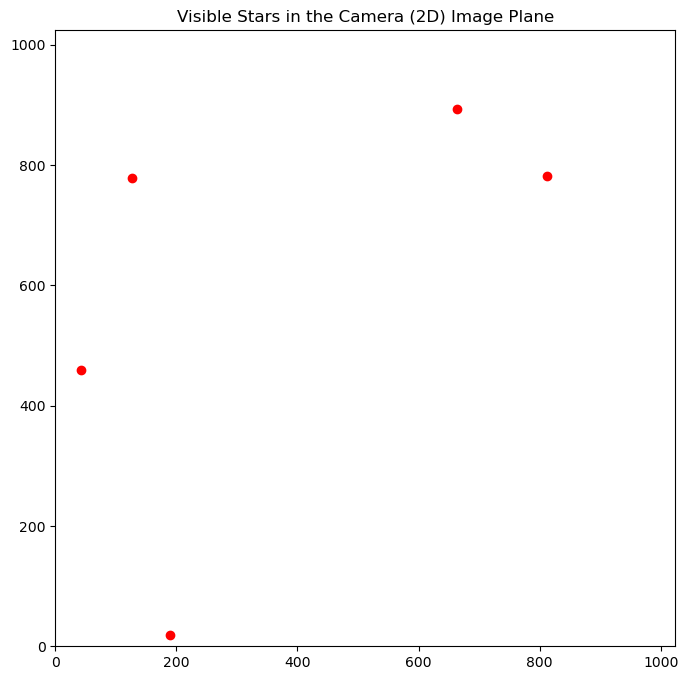

In [22]:
# Plot the visible stars on the camera's image plane
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(*zip(*visible_stars_2D), color='red', label='Visible Stars')
plt.xlim(0, umax)
plt.ylim(0, vmax)
ax.set_title('Visible Stars in the Camera (2D) Image Plane')


# Recreate the 3D Star Map with the (red) visible stars

Number of visible stars:  5


Visible Stars in 3D space:


[(-0.22477420360521502, -0.02536144286591887, 1),
 (-0.1545090886101769, -0.23618960484460827, 1),
 (-0.1840696902642453, 0.12713928738492178, 1),
 (0.14393557587450534, 0.1294296943868754, 1),
 (0.07236110558728409, 0.18241438540334515, 1)]

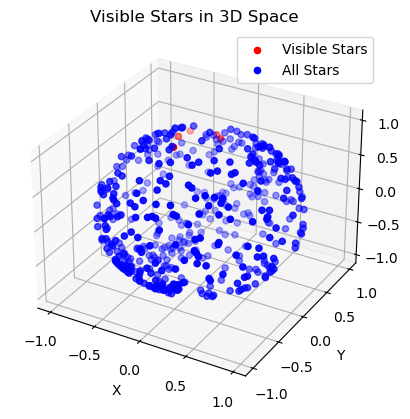

In [23]:

# Recreate the camera image with the visible stars in 3D space
def two_d_to_three_d(image_coords, fx, fy, u0, v0):
    # Convert 2D image coordinates to 3D space
    u, v = image_coords
    x = (u - u0) / fx
    y = (v - v0) / fy
    z = 1  # fromm the camera's perspective, the stars are in front of the camera in disttolmk_k_N
    return x, y, z
three_dimensional_stars = [two_d_to_three_d(image_coords, fx, fy, u0, v0) for image_coords in visible_stars_2D]
print("Number of visible stars: ", len(three_dimensional_stars))
print("\n")
print("Visible Stars in 3D space:") # Display the 3D coordinates of the visible stars: z is normalized to 1 because the stars are in front of the camera
display(three_dimensional_stars[:])


# Plot the visible stars in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*zip(*three_dimensional_stars), color='red', label='Visible Stars')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Visible Stars in 3D Space')

# Also plot the rest of the stars in 3D space for context and in blue color
ax.scatter(*zip(*[star[:3] for star in coord_mag]), color='blue', label='All Stars')
plt.legend()

# Simulate other images with different orientations of the Camera



Camera Image 1


Number of visible stars (in 2D image):  4


Visible stars:  [(42.289346726182146, 459.00219284308923), (968.3461353234121, 470.7369244295506), (189.12235753131336, 18.43458275622197), (127.34956825480651, 777.682968848271)]


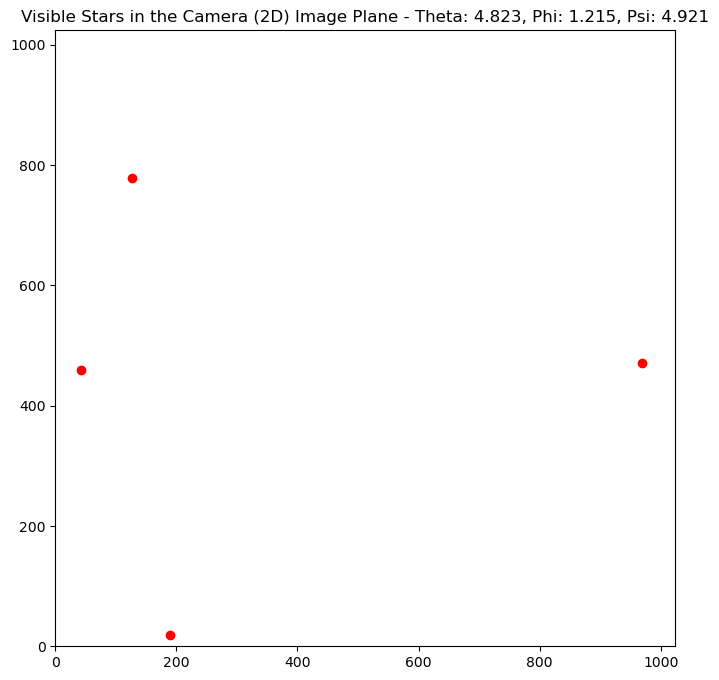

Number of visible stars in 3D (should match 2D):  4




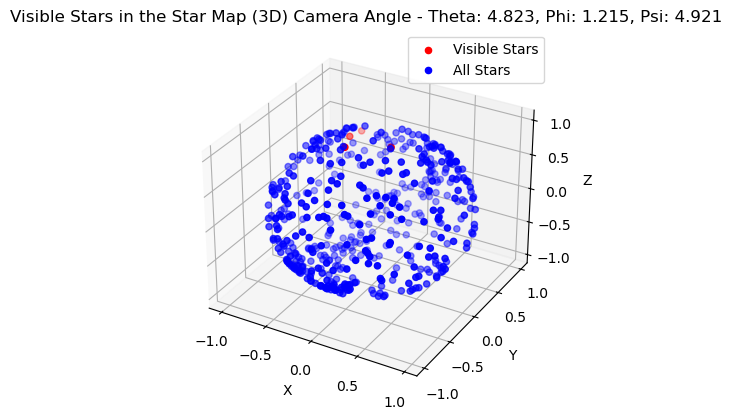



Camera Image 2


Number of visible stars (in 2D image):  4


Visible stars:  [(75.96385357026952, 109.98954523465073), (127.34956825480663, 777.6829688482711), (812.7821729049538, 782.4692323602537), (663.2130023457476, 893.1913411773702)]


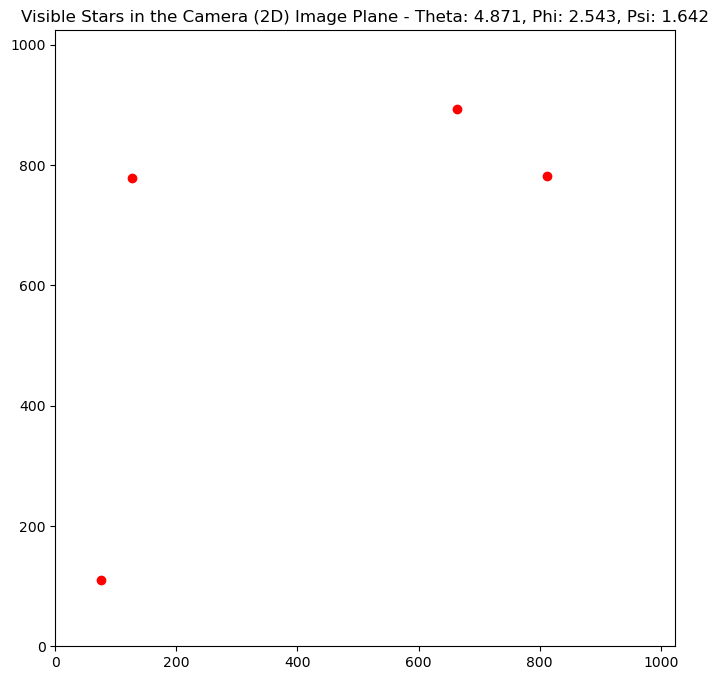

Number of visible stars in 3D (should match 2D):  4




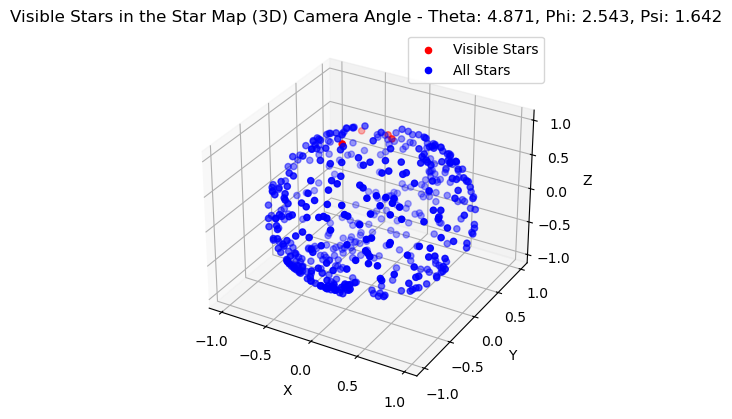



Camera Image 3


Number of visible stars (in 2D image):  3


Visible stars:  [(533.1637501432398, 528.5052116674987), (75.9638535702694, 109.98954523465068), (968.346135323412, 470.7369244295507)]


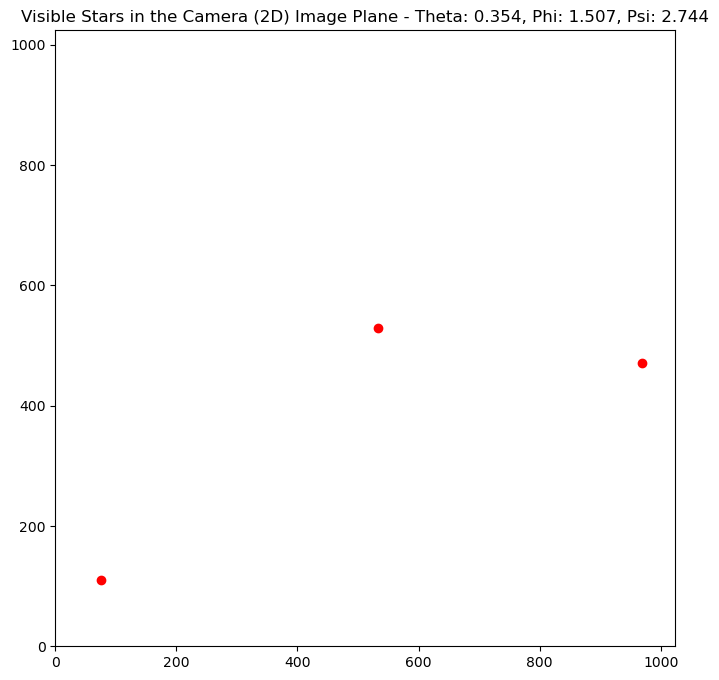

Number of visible stars in 3D (should match 2D):  3




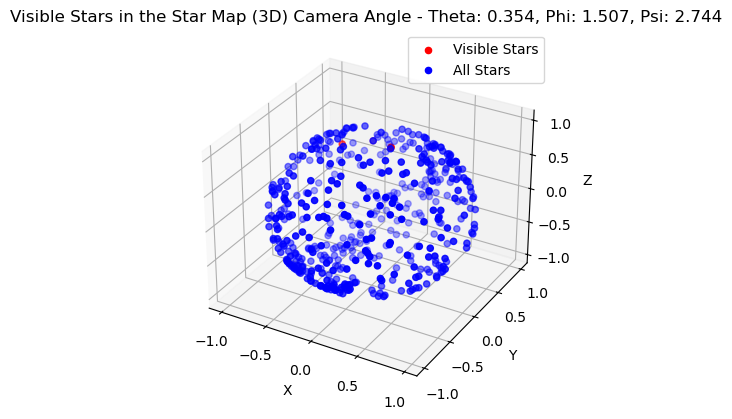



Camera Image 4


Number of visible stars (in 2D image):  3


Visible stars:  [(533.1637501432397, 528.5052116674985), (75.9638535702694, 109.98954523465056), (968.3461353234119, 470.73692442955075)]


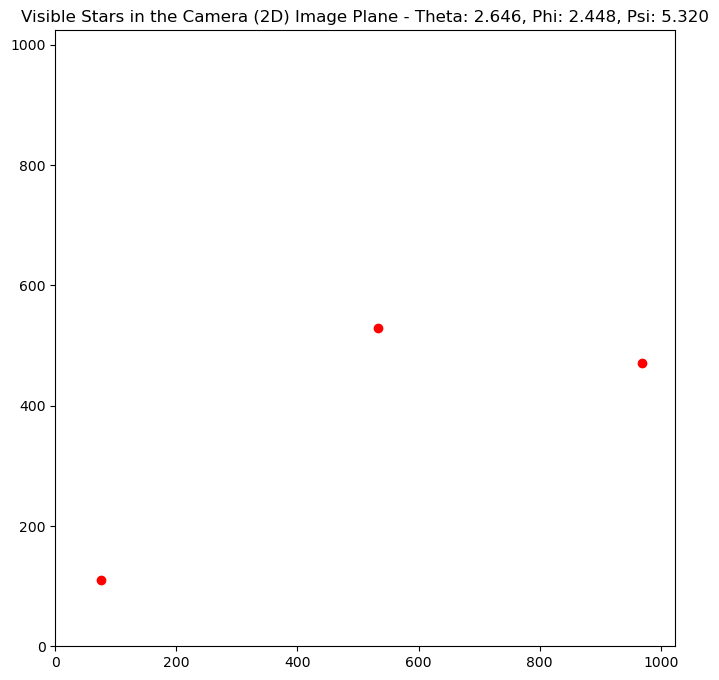

Number of visible stars in 3D (should match 2D):  3




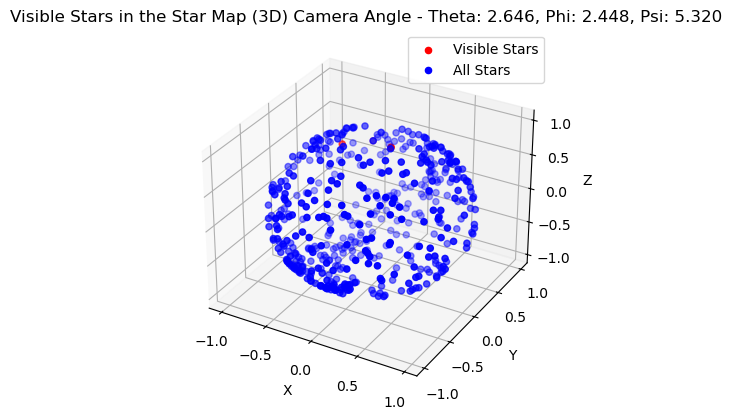

In [34]:
import plotly.graph_objs as go
from plotly.offline import iplot
for i in range(1, 5):
    print("\n")
    print(f"Camera Image {i}")
    theta = np.random.uniform(0, 2 * np.pi)
    phi = np.random.uniform(0, np.pi)
    psi = np.random.uniform(0, 2 * np.pi)
    visible_stars_2D = camera_image(star_data, fx, fy, u0, v0, alpha, umax, vmax, camera_position,  theta, phi, psi)
    # Plot i different camera images
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    ax.scatter(*zip(*visible_stars_2D), color='red', label='Visible Stars')
    plt.xlim(0, umax)
    plt.ylim(0, vmax)
    ax.set_title(f'Visible Stars in the Camera (2D) Image Plane - Theta: {theta:.3f}, Phi: {phi:.3f}, Psi: {psi:.3f}')
    plt.show()
    # plot the visible stars in 3D space
    three_dimensional_stars = [two_d_to_three_d(image_coords, fx, fy, u0, v0) for image_coords in visible_stars_2D]
    print("Number of visible stars in 3D (should match 2D): ", len(three_dimensional_stars))
    print("\n")
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*zip(*three_dimensional_stars), color='red', label='Visible Stars')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Visible Stars in the Star Map (3D) Camera Angle - Theta: {theta:.3f}, Phi: {phi:.3f}, Psi: {psi:.3f}')
    ax.scatter(*zip(*[star[:3] for star in coord_mag]), color='blue', label='All Stars')
    plt.legend()
    plt.show()

    # Create Plotly figure
    fig = go.Figure()

    # Add all stars to the Plotly figure
    fig.add_trace(go.Scatter3d(
        x=[star[0] for star in star_data],
        y=[star[1] for star in star_data],
        z=[star[2] for star in star_data],
        mode='markers',
        marker=dict(
            size=2,
            color='blue',  # All stars in blue
            opacity=0.5
        ),
        name='All Stars'
    ))

    # Add visible stars to the Plotly figure
    fig.add_trace(go.Scatter3d(
        x=[star[0] for star in three_dimensional_stars],
        y=[star[1] for star in three_dimensional_stars],
        z=[star[2] for star in three_dimensional_stars],
        mode='markers',
        marker=dict(
            size=5,
            color='red',  # Visible stars in red
            opacity=0.8
        ),
        name='Visible Stars'
    ))

    # Set up the layout for the Plotly plot
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='cube'  # Maintain aspect ratio
        ),
        margin=dict(l=0, r=0, b=0, t=0)
    )

    # Setting the camera view angle to match your matplotlib plot
    camera = dict(
        up=dict(x=0, y=0, z=1),  # This sets the up direction to the z-axis
        center=dict(x=0, y=0, z=0),  # This centers the camera on the origin
        #eye=dict(x=1.25, y=1.25, z=1.25)  # This sets the position of the camera
    )

    fig.update_layout(scene_camera=camera)

    # Show the figure
    fig.show()
